# Data Analysis 

Before we begin the feature selection step, it is important to analyze the data and see what kind of information we can decipher from the variables. In this notebook, we look at a popular dataset - the boston housing dataset - and determine whether we can understand information from the data. 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("train.csv")
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 1460 samples of data, each representing the characteristics of a house with 81 different characteristics (variables) that we can use for training. We notice that there are many NaN values for a lot of the variables, so our first step is to determine the percentage of NaN values for each variable in the dataset

## NaN value analyzer  

In [18]:
data['PoolQC'].isnull() #This command lists out every value in a column if it is null or not (true or false). 
data['PoolQC'].isnull().sum() #This command calculates the total number of null values in a column 
data['PoolQC'].isnull().mean() #This calculates the mean number of null values. % of values that are NaN from the dataset
data['PoolQC'].isnull().any() #This tells you if there is any null value at all from these columns. 

#Hence, we can find using list comprehension the following: variable, for variable in every column if there is more than one nan in the col
var_nan = [var for var in data.columns if data[var].isnull().sum()>1]

for var in var_nan:
    print(var, np.round(data[var].isnull().mean(),3), '% of values missing')


LotFrontage 0.177 % of values missing
Alley 0.938 % of values missing
MasVnrType 0.005 % of values missing
MasVnrArea 0.005 % of values missing
BsmtQual 0.025 % of values missing
BsmtCond 0.025 % of values missing
BsmtExposure 0.026 % of values missing
BsmtFinType1 0.025 % of values missing
BsmtFinType2 0.026 % of values missing
FireplaceQu 0.473 % of values missing
GarageType 0.055 % of values missing
GarageYrBlt 0.055 % of values missing
GarageFinish 0.055 % of values missing
GarageQual 0.055 % of values missing
GarageCond 0.055 % of values missing
PoolQC 0.995 % of values missing
Fence 0.808 % of values missing
MiscFeature 0.963 % of values missing


## NaN determine usefulness of variables 

At this stage, we see that there are many values that are NaN. We want to see if the NaN values have an impact on the final output. Hence, for each variable, we want to plot the final cost vs each variable to see whether the information would make any valuable contribution or not. If we are dealing with binary variables, we plot them both. If there is no change between the plots for both variables, we can discard them. Else we can keep them as they would be a contributing factor.

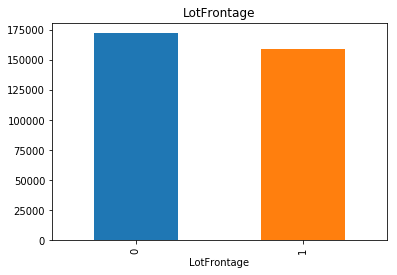

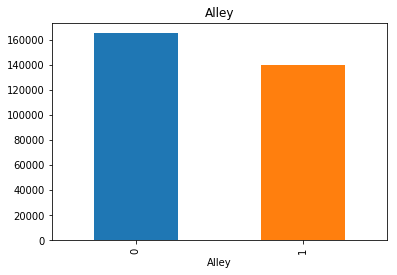

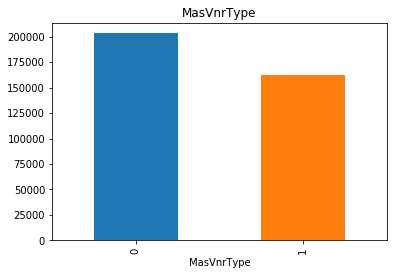

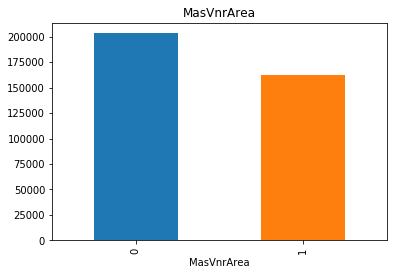

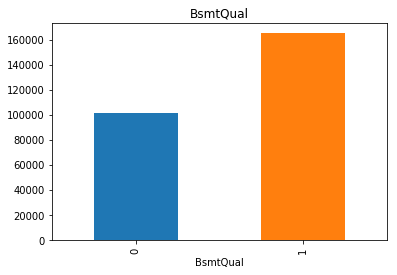

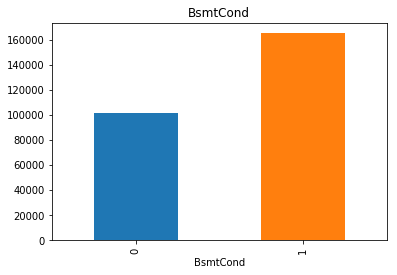

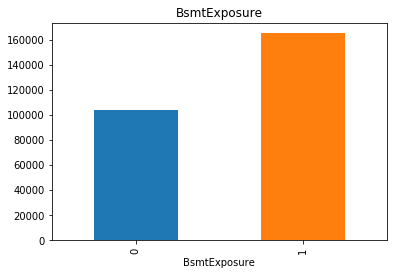

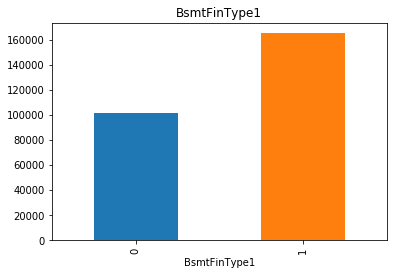

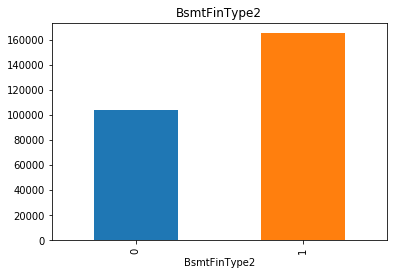

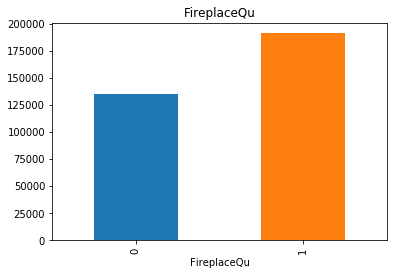

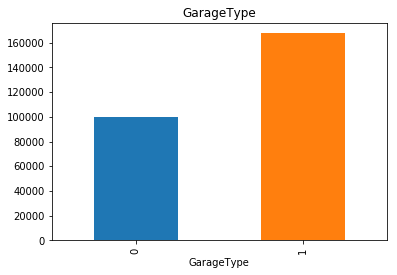

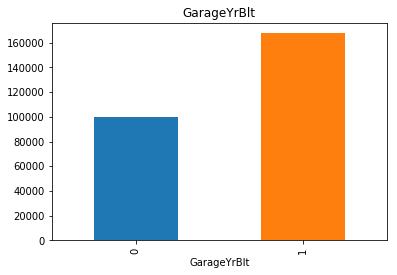

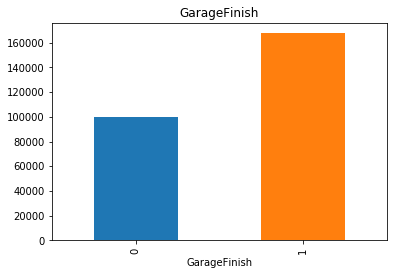

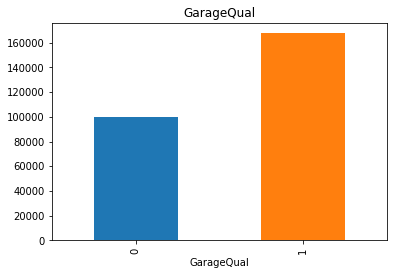

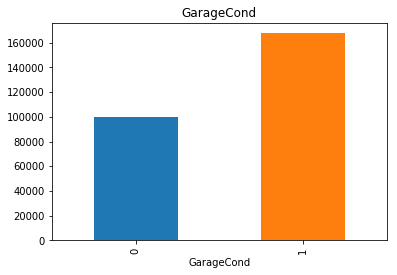

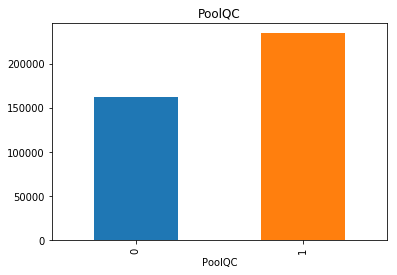

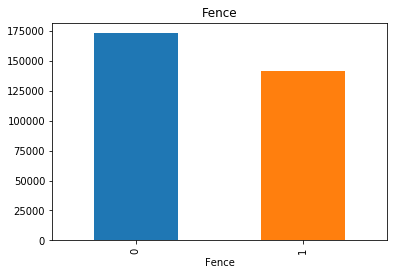

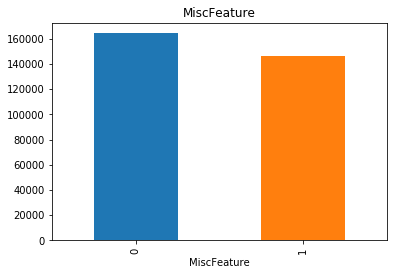

In [31]:
def analyze_nan(df,var):
    df = df.copy()
    df[var] = np.where(df[var].isnull(),0,1)  #Replaces every instance of a NaN with a 0 and 1 otherwise. 
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in var_nan:
    analyze_nan(data,var)

## Temporal Variables 

We can take a look at the temporal variables and determine whether we might need them or discard them. For variables that include a temporal (time) element, it is better to extract a bit of information first instead of just taking the variables as they are. For example, instead of taking the year as simply, the year, we could take the difference and calculate the age. Let's look into it in more detail 

In [34]:
# list the temporal variables. In this case, we are just searching for the presence of keyword "Year" or "Yr"

year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

we imm